In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The following code will take a text file output from our numerical data which covers 7 measurements per second. Before running through this code, manually open up the text file and remove the string of Values that indicated the beginning of a new test.[ex: Orientation Sensor TestOrientation Sensor Test10 Sample Average, Cumulative Sum, GSR Overall Average, Gyro X, Gyro Y, Gyro Z, Acc X, Acc Y, Acc Z] This is to make sure you are only analyzing the data from the condition intended. 

In [14]:
def to_dataframe(text_file):
    my_file = open(text_file, "r")
    baseline_data = my_file.read()
    data_into_list = baseline_data.split(",")

    my_file.close()

    baseline = [float(l) for l in data_into_list]


    #Orientation Sensor TestOrientation Sensor Test10 Sample Average, Cumulative Sum, GSR Overall Average, Gyro X, Gyro Y, Gyro Z, Acc X, Acc Y, Acc Z184,
    names = ["Sample Average", "Cumulative GSR Sum", "GSR Overall Average", "Gyro X", "Gyro Y", "Gyro Z", "Acc X", "Acc Y", "Acc Z"]
    sample_average = []
    cumulative_sum = []
    gsr_overall_average = []
    gyro_x = []
    gyro_y = []
    gyro_z = []
    acc_x = [] 
    acc_y = []
    acc_z = []

    for i in range(0, len(baseline)-8, 8):

        sample_average.append(baseline[i])
        cumulative_sum.append(baseline[i+1])
        gsr_overall_average.append(baseline[i+2])
        gyro_x.append(baseline[i+3])
        gyro_y.append(baseline[i+4])
        gyro_z.append(baseline[i+5])
        acc_x.append(baseline[i+6])
        acc_y.append(baseline[i+7])
        acc_z.append(baseline[i+8])
        
    return [sample_average, cumulative_sum, gsr_overall_average, gyro_x, gyro_y, gyro_z, acc_x, acc_y, acc_z]

    


In [15]:
easy_notime = to_dataframe("EasyTask_NoTime.txt")

In [16]:
#reporting values for the entire condition: 

print("mean of all Sample Averages:", np.mean(easy_notime[0]))
print("(last) Cumulative Sum of GSR:", easy_notime[1][-1])
print("GSR overall average ALL:", np.mean(easy_notime[2]))

mean of all Sample Averages: 68.50096880750637
(last) Cumulative Sum of GSR: 120179.0
GSR overall average ALL: 158.4198473282443


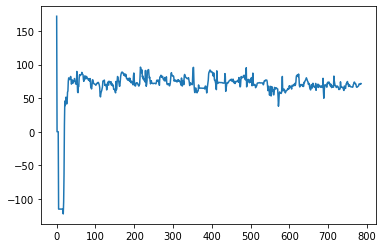

In [17]:
#optional manual cumulative sum 
sum(easy_notime[2])

plt.plot(range(0, len(easy_notime[0])), easy_notime[0])

In [18]:
#angular distance between two points 
time = 0.143 #relates to 7 samples per second
angular_velocity=[((easy_notime[3][i+1] - easy_notime[3][i])**2 + (easy_notime[4][i+1] - easy_notime[4][i])**2 + (easy_notime[5][i+1] - easy_notime[5][i])**2)/time for i in range(0, len(easy_notime[3])-1)]
print(angular_velocity)


[0.0, 0.0, 0.0, 999607.7906468533, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 903159.5552884616, 903172.8857080421, 11351.699082167834, 18554.714816433567, 41621.1756993007, 16901.387674825175, 4532.151442307692, 775.7047639860141, 643.8210227272727, 657.4792395104896, 23017.427884615387, 410.6206293706294, 1622.8966346153848, 55.80747377622378, 3032.069493006993, 392.9468968531469, 21.252185314685317, 47.58522727272727, 347.6289335664336, 72.9075611888112, 112.59833916083917, 165.6741695804196, 459.29851398601403, 18.82102272727273, 212.4672202797203, 190.4228583916084, 26.688155594405597, 188.4560751748252, 132.04763986013987, 107.35358391608392, 209.43509615384616, 202.74256993006995, 22.80922202797203, 126.91215034965036, 588.5598776223777, 239.75633741258744, 3895.214160839161, 3285.565996503497, 2473.9401223776226, 99.70498251748252, 912.1776660839162, 98.47574300699301, 1132.7032342657344, 185.4512674825175, 28.108610139860144, 45.91892482517483, 57.09134615384616, 13.904

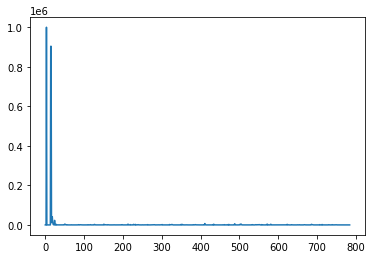

In [19]:
plt.plot(range(0, len(angular_velocity)), angular_velocity)

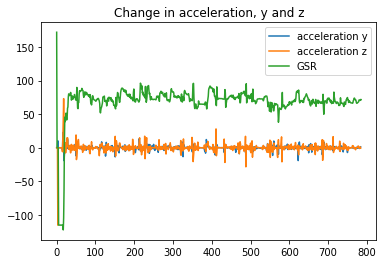

In [21]:
acc_x_diff = [easy_notime[6][i+1] - easy_notime[6][i] for i in range(0, len(easy_notime[6])-1)] 
acc_y_diff = [easy_notime[7][i+1] - easy_notime[7][i] for i in range(0, len(easy_notime[7])-1)] 
acc_z_diff = [easy_notime[8][i+1] - easy_notime[8][i] for i in range(0, len(easy_notime[8])-1)] 


# plt.plot(range(0, len(acc_x_diff)), acc_x_diff, label='acceleration x')
plt.plot(range(0, len(acc_y_diff)), acc_y_diff, label = 'acceleration y')
plt.plot(range(0, len(acc_z_diff)), acc_z_diff, label = 'acceleration z')
plt.plot(range(0, len(easy_notime[0])), easy_notime[0], label = 'GSR')
plt.legend()
plt.title('Change in acceleration, y and z')
plt.show()



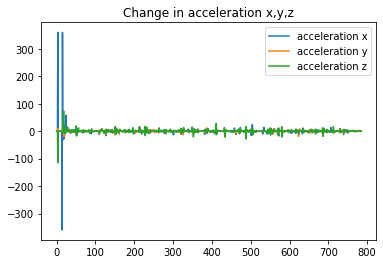

In [22]:
plt.plot(range(0, len(acc_x_diff)), acc_x_diff, label='acceleration x')
plt.plot(range(0, len(acc_y_diff)), acc_y_diff, label = 'acceleration y')
plt.plot(range(0, len(acc_z_diff)), acc_z_diff, label = 'acceleration z')

plt.legend()
plt.title('Change in acceleration x,y,z')
plt.show()

mean of all Sample Averages: 74.14128949223847
(last) Cumulative Sum of GSR: 255727.0
GSR overall average ALL: 136.3824521934758


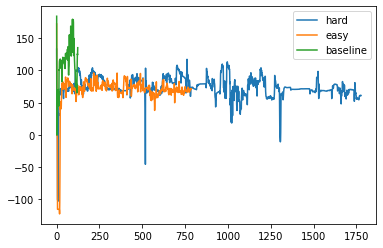

In [23]:

hard_notime = to_dataframe("HardTask_NoTime.txt")
base = to_dataframe('Baseline_Test1.txt')

print("mean of all Sample Averages:", np.mean(hard_notime[0]))
print("(last) Cumulative Sum of GSR:", hard_notime[1][-1])
print("GSR overall average ALL:", np.mean(hard_notime[2]))

angular_velocity_hard=[((hard_notime[3][i+1] - hard_notime[3][i])**2 + (hard_notime[4][i+1] - hard_notime[4][i])**2 + (hard_notime[5][i+1] - hard_notime[5][i])**2)/time for i in range(0, len(hard_notime[3])-1)]
angular_velocity_base=[((base[3][i+1] - base[3][i])**2 + (base[4][i+1] - base[4][i])**2 + (base[5][i+1] - base[5][i])**2)/time for i in range(0, len(base[3])-1)]


plt.plot(range(0, len(hard_notime[0])), hard_notime[0], label='hard')
plt.plot(range(0, len(easy_notime[0])), easy_notime[0], label='easy')
plt.plot(range(0, len(base[0])), base[0], label='baseline')

plt.legend()
plt.show()
